In [1]:
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os

In [2]:
data = pd.read_csv("parkinsons_updrs.data.csv")
data.drop(["motor_UPDRS"], axis=1, inplace=True)

In [3]:
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [4]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
X.shape
featsel = ExtraTreesRegressor(n_estimators=50) #might need to change this number
featsel = featsel.fit(X, y)
featsel.feature_importances_  
model = SelectFromModel(featsel, prefit=True)
X_new = model.transform(X)
X_new.shape               

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(5875, 4)

In [5]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

array([26.23 , 26.23 , 20.867, ..., 22.644, 47.561, 38.353])

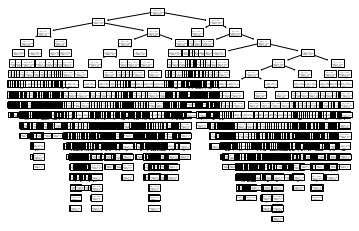

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

btree = tree.DecisionTreeRegressor()
btree = btree.fit(x_train, y_train)

tree.plot_tree(btree)

btree.predict(x_test)


In [7]:
btree.score(x_test, y_test)

0.9999999996925744

In [8]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = btree.predict(x_train)
y_pred_test = btree.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for Basic Tree: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for Multiple Basic Tree: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training Accuracy for Basic Tree:  0.999999999881474
Testing Accuracy for Multiple Basic Tree:  0.9999999996925744
RMSE for Training Data:  0.00011567332946243955
RMSE for Testing Data:  0.00019272225510372584
